In [ ]:
import pandas as pd
import numpy as np
from sklearn import model_selection
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

# Cargar el dataset

In [ ]:
data = pd.read_csv('Data ML - DATA SET.csv')
data = data.sample(frac=1)

In [ ]:
data.drop('CÓDIGO - ALUMNO', inplace = True, axis=1)
data.drop('AÑO', inplace = True, axis=1)

In [ ]:
data.head(10)

,EDAD,SEXO,NACIONALIDAD,POBLACIÓN,TIEMPO DE ESTUDIO,ACTIVIDADES EXTRACADÉMICAS,TAMAÑO DE LA FAMILIA,TIPO DE VIVIENDA,ENCARGADO DEL MENOR,ESTADO CIVIL - PADRE,...,TRABAJO - MADRE,NACIONALIDAD - MADRE,VIVE CON EL ESTUDIANTE - MADRE,GRADO,AÑO LECTIVO,ÁREA,COMPETENCIA,NOTA,ENFERMEDADES,TIENE NECESIDADES ESPECIALES
937,11,Femenino,PERÚ,Urbano,4 - 6 horas,Ninguno,5 - 8,Conjunto Residencial,Madre,Casado,...,Artes Gráficas,PERÚ,SI,PRIMARIA,SEXTO GRADO,EDUCACIÓN FÍSICA,COM0008,A,Ninguna,NO
655,11,Femenino,PERÚ,Urbano,4 - 6 horas,Ninguno,5 - 8,Unifamiliar,Padre,Conviviente,...,Artesanías y Manualidades,PERÚ,NO,PRIMARIA,SEXTO GRADO,CASTELLANO COMO SEGUNDA LENGUA,COM0028,A,Ninguna,NO
369,7,Masculino,PERÚ,Urbano,4 - 6 horas,Ninguno,1 - 4,Conjunto Residencial,Madre,Casado,...,Textil y Confección,PERÚ,SI,PRIMARIA,SEGUNDO GRADO,MATEMÁTICA,COM0016,A,Ninguna,NO
4379,16,Femenino,PERÚ,Urbano,2 - 4 horas,Equipos Académicos,9 - 12,Conjunto Residencial,Madre,Casado,...,"Comunicación, Imagen y Sonido",PERÚ,SI,SECUNDARIA,QUINTO AÑO,CIENCIA Y TECNOLOGÍA,COM0019,A,Ninguna,NO
3735,11,Femenino,PERÚ,Urbano,4 - 6 horas,Ninguno,5 - 8,Conjunto Residencial,Familiar Cercano,Viudo,...,Actividades Agrarias,PERÚ,NO,PRIMARIA,SEXTO GRADO,PERSONAL SOCIAL,COM0004,A,Ninguna,NO
1181,8,Masculino,PERÚ,Urbano,1 - 2 horas,Equipos Deportivos,1 - 4,Unifamiliar,Madre,Casado,...,Independiente,PERÚ,SI,PRIMARIA,TERCER GRADO,PERSONAL SOCIAL,COM0002,A,Ninguna,NO
386,8,Masculino,PERÚ,Urbano,4 - 6 horas,Ninguno,1 - 4,Conjunto Residencial,Madre,Casado,...,Textil y Confección,PERÚ,SI,PRIMARIA,TERCER GRADO,EDUCACIÓN FÍSICA,COM0007,A,Ninguna,NO
361,7,Masculino,PERÚ,Urbano,4 - 6 horas,Ninguno,1 - 4,Conjunto Residencial,Madre,Casado,...,Textil y Confección,PERÚ,SI,PRIMARIA,SEGUNDO GRADO,EDUCACIÓN FÍSICA,COM0008,A,Ninguna,NO
2994,14,Masculino,PERÚ,Urbano,6 - 8 horas,Ninguno,9 - 12,Conjunto Residencial,Madre,Divorciado,...,Docencia,PERÚ,SI,SECUNDARIA,TERCER AÑO,ARTE Y CULTURA,COM0009,AD,Ninguna,NO
4152,13,Masculino,PERÚ,Urbano,4 - 6 horas,Ninguno,5 - 8,Edificio Multifamiliar,Padre,Conviviente,...,Independiente,PERÚ,NO,SECUNDARIA,SEGUNDO AÑO,INGLÉS,COM0034,A,Ninguna,NO


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4393 entries, 937 to 1258
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   EDAD                            4393 non-null   int64 
 1   SEXO                            4393 non-null   object
 2   NACIONALIDAD                    4393 non-null   object
 3   POBLACIÓN                       4393 non-null   object
 4   TIEMPO DE ESTUDIO               4393 non-null   object
 5   ACTIVIDADES EXTRACADÉMICAS      4393 non-null   object
 6   TAMAÑO DE LA FAMILIA            4393 non-null   object
 7   TIPO DE VIVIENDA                4393 non-null   object
 8   ENCARGADO DEL MENOR             4393 non-null   object
 9   ESTADO CIVIL - PADRE            4393 non-null   object
 10  EDUCACIÓN - PADRE               4393 non-null   object
 11  TRABAJO - PADRE                 4393 non-null   object
 12  NACIONALIDAD - PADRE            4393 non-null 

In [ ]:
data.describe()

,EDAD
count,4393.000000
mean,10.676076
std,2.266513
min,6.000000
25%,9.000000
50%,11.000000
75%,12.000000
max,16.000000


# EDA

In [ ]:
data['NOTA'].value_counts()

A     3564
AD     743
B       85
D        1
Name: NOTA, dtype: int64

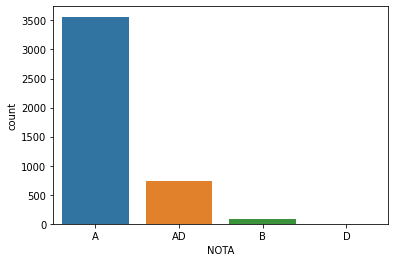

In [ ]:
sns.countplot(x=data['NOTA'])

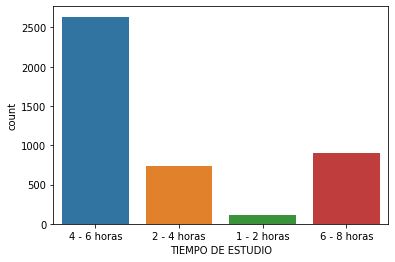

In [ ]:
sns.countplot(x=data['TIEMPO DE ESTUDIO'])

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

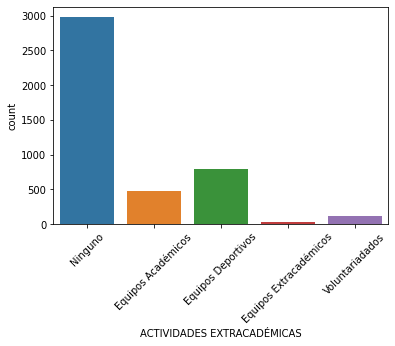

In [ ]:
sns.countplot(x=data['ACTIVIDADES EXTRACADÉMICAS'])
plt.xticks(rotation=45)

# Preprocesamiento de datos

## Datos categoricos a datos numericos

In [ ]:
data['SEXO'].replace(['Masculino', 'Femenino'], [0,1], inplace=True)
data['NACIONALIDAD'].replace(['PERÚ', 'Extranjero'], [1,0], inplace=True)
data['POBLACIÓN'].replace(['Urbano', 'Rural'], [0,1], inplace=True)
data['TIEMPO DE ESTUDIO'].replace(['1 - 2 horas', '2 - 4 horas', '4 - 6 horas', '6 - 8 horas', '8 - más horas', 'Ninguno'], [1,2,3,4,5,0], inplace=True)
data['ACTIVIDADES EXTRACADÉMICAS'].replace(['Grupos Artísticos','Equipos Deportivos','Equipos Académicos','Equipos Extracadémicos','Voluntariadados','Ninguno'], [1,2,3,4,5,0], inplace=True)
data['TAMAÑO DE LA FAMILIA'].replace(['1 - 4','5 - 8','9 - 12','13 - más'], [1,2,3,4], inplace=True)
data['TIPO DE VIVIENDA'].replace(['Unifamiliar','Edificio Multifamiliar','Conjunto Residencial','Quinta','Otro'], [1,2,3,4,0], inplace=True)
data['ENCARGADO DEL MENOR'].replace(['Padre','Madre','Apoderado','Familiar Cercano','Personal Autorizado','Otro'], [1,2,3,4,5,0], inplace=True)
data['ESTADO CIVIL - PADRE'].replace(['Soltero','Casado','Divorciado','Viudo','Conviviente'], [1,2,3,4,5], inplace=True)
data['ESTADO CIVIL - MADRE'].replace(['Soltero','Casado','Divorciado','Viudo','Conviviente'], [1,2,3,4,5], inplace=True)
data['EDUCACIÓN - PADRE'].replace(['Edcacion Inicial','Educacion Primaria','Educacion Secundaria',
                                   'Educación Profesional Técnica','Grado Superior','Educación Universitaria','Ninguno'], [1,2,3,4,5,6,0], inplace=True)
data['EDUCACIÓN - MADRE'].replace(['Edcacion Inicial','Educacion Primaria','Educacion Secundaria',
                                   'Educación Profesional Técnica','Grado Superior','Educación Universitaria','Ninguno'], [1,2,3,4,5,6,0], inplace=True)
data['TRABAJO - PADRE'].replace(['Administración y Comercio','Actividades Agrarias','Actividades Marítimo-Pesqueras','Artes Gráficas',
                                 'Artesanías y Manualidades','Computación e Informática','Comunicación, Imagen y Sonido','Construcción','Cuero y Calzado',
                                 'Electricidad y Electrónica','Estética Personal','Hostelería y Turismo','Industrias Alimentarias','Mecánica y Metales',
                                 'Mecánica y Motores','Minería','Química','Textil y Confección','Independiente','Docencia','Medicina'], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21], inplace=True)
data['TRABAJO - MADRE'].replace(['Administración y Comercio','Actividades Agrarias','Actividades Marítimo-Pesqueras','Artes Gráficas',
                                 'Artesanías y Manualidades','Computación e Informática','Comunicación, Imagen y Sonido','Construcción','Cuero y Calzado',
                                 'Electricidad y Electrónica','Estética Personal','Hostelería y Turismo','Industrias Alimentarias','Mecánica y Metales',
                                 'Mecánica y Motores','Minería','Química','Textil y Confección','Independiente','Docencia','Medicina'], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21], inplace=True)
data['NACIONALIDAD - PADRE'].replace(['PERÚ', 'Extranjero'], [1,0], inplace=True)
data['NACIONALIDAD - MADRE'].replace(['PERÚ', 'Extranjero'], [1,0], inplace=True)
data['VIVE CON EL ESTUDIANTE - PADRE'].replace(['SI', 'NO'], [1,2], inplace=True)
data['VIVE CON EL ESTUDIANTE - MADRE'].replace(['SI', 'NO'], [1,2], inplace=True)
data['ENFERMEDADES'].replace(['Dislexia','Disgrafía','Discalculia','Discapacidad de la Memoria y el Procesamiento Auditivo','Trastorno por Déficit de Atención e Hiperactividad (TDHA)'
                              ,'Trastorno del Espectro Autista/Trastorno Generalizado del Desarrollo','Discapacidad Intelectual','Otros','Ninguna'], [1,2,3,4,5,6,7,8,0], inplace=True)
data['TIENE NECESIDADES ESPECIALES'].replace(['SI', 'NO'], [1,0], inplace=True)
data['GRADO'].replace(['PRIMARIA', 'SECUNDARIA'], [1,2], inplace=True)
data['AÑO LECTIVO'].replace(['PRIMER GRADO', 'SEGUNDO GRADO', 'TERCER GRADO', 'CUARTO GRADO', 'QUINTO GRADO', 'SEXTO GRADO',
                             'PRIMER AÑO', 'SEGUNDO AÑO', 'TERCER AÑO','CUARTO AÑO','QUINTO AÑO'], [1,2,3,4,5,6,7,8,9,10,11], inplace=True)
data['ÁREA'].replace(['CIENCIA Y TECNOLOGÍA', 'CASTELLANO COMO SEGUNDA LENGUA', 'INGLÉS',
                             'MATEMÁTICA', 'COMUNICACIÓN', 'ARTE Y CULTURA', 'EDUCACIÓN FÍSICA',
                             'EDUCACIÓN RELIGIOSA', 'PERSONAL SOCIAL', 'CIENCIAS SOCIALES',
                             'DESARROLLO PERSONAL, CIUDADANÍA Y CÍVICA',
                             'EDUCACIÓN PARA EL TRABAJO'], [1,2,3,4,5,6,7,8,9,10,11,12], inplace=True)

In [ ]:
codes = np.arange(1, 42, 1)
new = []
for i in range(1, 42):
    if i < 10:
        new.append('COM000'+str(i))
        #print('COM000'+str(i))
    else: new.append('COM00'+str(i))
data['COMPETENCIA'].replace(new, codes, inplace=True)

In [ ]:
data['NOTA'].replace(['AD', 'A', 'B', 'D'], [4,3,2,1], inplace=True)

In [ ]:
data['NOTA'].unique()

array([3, 4, 2, 1])

In [ ]:
data.head()

,EDAD,SEXO,NACIONALIDAD,POBLACIÓN,TIEMPO DE ESTUDIO,ACTIVIDADES EXTRACADÉMICAS,TAMAÑO DE LA FAMILIA,TIPO DE VIVIENDA,ENCARGADO DEL MENOR,ESTADO CIVIL - PADRE,...,TRABAJO - MADRE,NACIONALIDAD - MADRE,VIVE CON EL ESTUDIANTE - MADRE,GRADO,AÑO LECTIVO,ÁREA,COMPETENCIA,NOTA,ENFERMEDADES,TIENE NECESIDADES ESPECIALES
937,11,1,1,0,3,0,2,3,2,2,...,4,1,1,1,6,7,8,3,0,0
655,11,1,1,0,3,0,2,1,1,5,...,5,1,2,1,6,2,28,3,0,0
369,7,0,1,0,3,0,1,3,2,2,...,18,1,1,1,2,4,16,3,0,0
4379,16,1,1,0,2,3,3,3,2,2,...,7,1,1,2,11,1,19,3,0,0
3735,11,1,1,0,3,0,2,3,4,4,...,2,1,2,1,6,9,4,3,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4393 entries, 937 to 1258
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   EDAD                            4393 non-null   int64
 1   SEXO                            4393 non-null   int64
 2   NACIONALIDAD                    4393 non-null   int64
 3   POBLACIÓN                       4393 non-null   int64
 4   TIEMPO DE ESTUDIO               4393 non-null   int64
 5   ACTIVIDADES EXTRACADÉMICAS      4393 non-null   int64
 6   TAMAÑO DE LA FAMILIA            4393 non-null   int64
 7   TIPO DE VIVIENDA                4393 non-null   int64
 8   ENCARGADO DEL MENOR             4393 non-null   int64
 9   ESTADO CIVIL - PADRE            4393 non-null   int64
 10  EDUCACIÓN - PADRE               4393 non-null   int64
 11  TRABAJO - PADRE                 4393 non-null   int64
 12  NACIONALIDAD - PADRE            4393 non-null   int64
 13  V

## Set de Entrenamiento y Validación

In [ ]:
X = data.loc[:,data.columns != 'NOTA']
Y = data.loc[:,'NOTA']

In [ ]:
Y

937     3
655     3
369     3
4379    3
3735    3
       ..
3149    4
3552    3
607     3
1624    3
1258    4
Name: NOTA, Length: 4393, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le=LabelEncoder()
Y=le.fit_transform(Y)
Y=to_categorical(Y,4)

In [ ]:
Y

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
X.head(5)

,EDAD,SEXO,NACIONALIDAD,POBLACIÓN,TIEMPO DE ESTUDIO,ACTIVIDADES EXTRACADÉMICAS,TAMAÑO DE LA FAMILIA,TIPO DE VIVIENDA,ENCARGADO DEL MENOR,ESTADO CIVIL - PADRE,...,EDUCACIÓN - MADRE,TRABAJO - MADRE,NACIONALIDAD - MADRE,VIVE CON EL ESTUDIANTE - MADRE,GRADO,AÑO LECTIVO,ÁREA,COMPETENCIA,ENFERMEDADES,TIENE NECESIDADES ESPECIALES
937,11,1,1,0,3,0,2,3,2,2,...,6,4,1,1,1,6,7,8,0,0
655,11,1,1,0,3,0,2,1,1,5,...,4,5,1,2,1,6,2,28,0,0
369,7,0,1,0,3,0,1,3,2,2,...,6,18,1,1,1,2,4,16,0,0
4379,16,1,1,0,2,3,3,3,2,2,...,6,7,1,1,2,11,1,19,0,0
3735,11,1,1,0,3,0,2,3,4,4,...,4,2,1,2,1,6,9,4,0,0


In [ ]:
x_train, x_test, y_train, y_test=model_selection.train_test_split(X,Y,test_size=0.20) # 80-20

## Normalizacion 

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # normalizacion de la data

trainX_scaled = scaler.fit_transform(x_train)
testX_scaled = scaler.transform(x_test)

In [ ]:
trainX_scaled[0]

array([ 1.46738051,  1.26532062,  0.        ,  0.        ,  0.02352913,
       -0.64323879,  0.34234956,  1.20356604,  2.62453715,  1.49196399,
        0.51675247,  1.59956779,  0.        , -0.40062699,  1.49196399,
       -0.9864684 , -1.73341832,  0.        ,  2.34678661,  1.32925887,
        1.47087976,  0.59026281,  1.09424575, -0.26679823,  0.        ])

# Entrenamiento del modelo

In [ ]:
x_train.shape

(3514, 25)

In [ ]:
trainX_scaled.shape

(3514, 25)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


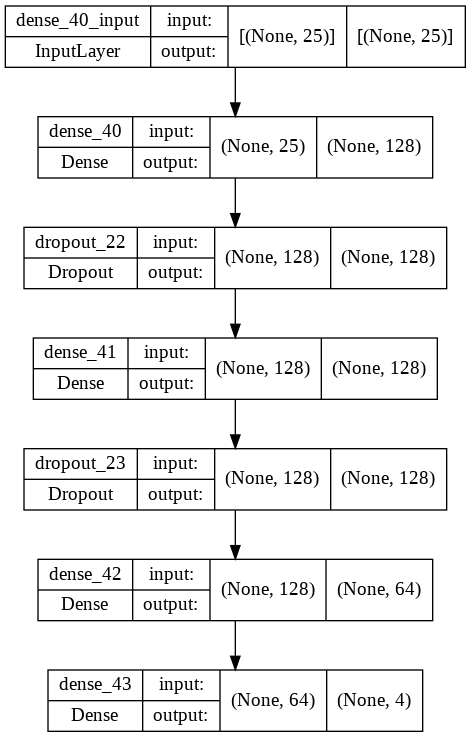

In [ ]:
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print("Comenzando entrenamiento...")
historial = model.fit(trainX_scaled, y_train, epochs=50, verbose=True)
print("Modelo entrenado!")

Comenzando entrenamiento...
Epoch 1/50
110/110 [==============================] - 1s 2ms/step - loss: 0.2665 - accuracy: 0.9051 - precision: 0.8154 - recall: 0.8019
Epoch 2/50
110/110 [==============================] - 0s 2ms/step - loss: 0.2434 - accuracy: 0.9079 - precision: 0.8164 - recall: 0.8150
Epoch 3/50
110/110 [==============================] - 0s 2ms/step - loss: 0.2343 - accuracy: 0.9059 - precision: 0.8120 - recall: 0.8113
Epoch 4/50
110/110 [==============================] - 0s 2ms/step - loss: 0.2250 - accuracy: 0.9091 - precision: 0.8184 - recall: 0.8182
Epoch 5/50
110/110 [==============================] - 0s 2ms/step - loss: 0.2220 - accuracy: 0.9074 - precision: 0.8147 - recall: 0.8147
Epoch 6/50
110/110 [==============================] - 0s 2ms/step - loss: 0.2202 - accuracy: 0.9077 - precision: 0.8153 - recall: 0.8153
Epoch 7/50
110/110 [==============================] - 0s 2ms/step - loss: 0.2196 - accuracy: 0.9054 - precision: 0.8110 - recall: 0.8108
Epoch 8/50
11

# Validacion

In [ ]:
model.evaluate(x_test, y_test)

28/28 [==============================] - 0s 1ms/step - loss: 1.9959 - accuracy: 0.9067 - precision: 0.8134 - recall: 0.8134


[1.9958851337432861,
 0.9067121744155884,
 0.8134243488311768,
 0.8134243488311768]

In [ ]:
model.predict(x_test[1:2])

array([[0.0000000e+00, 2.0916706e-33, 1.0000000e+00, 1.6326748e-14]],
      dtype=float32)

In [ ]:
print(y_test)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


879


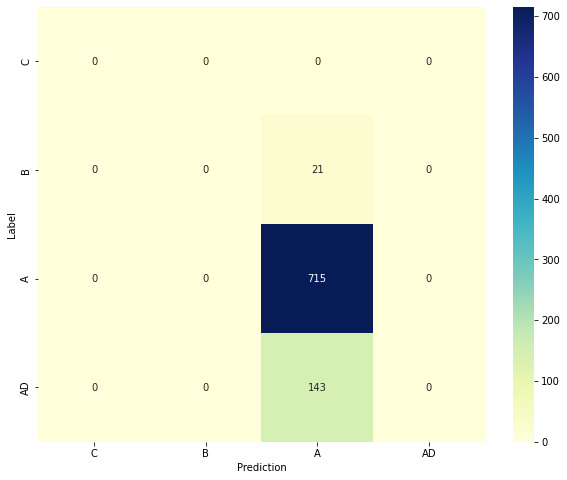

In [ ]:
res = model.predict(x_test)

preds = np.zeros(res.shape[0])
true = np.zeros(res.shape[0])

for i in range(len(preds)):
    index_max = np.argmax(res[i])
    preds[i] = index_max

for i in range(len(true)):
    index_max = np.argmax(y_test[i])
    true[i] = index_max

print(len(preds))

confusion_mtx = tf.math.confusion_matrix(true, preds)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=['C', 'B', 'A', 'AD'],
            yticklabels=['C', 'B', 'A', 'AD'],
            annot=True, fmt='g',
            cmap="YlGnBu")
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()